In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.cluster import KMeans
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
prosecution = pd.read_csv('./California/Hate-Prosecution-survey-2004-2020.csv')
prosecution.head()

,Year,Agency Type,Agency Name,Total Hate Crime Cases Referred,Total Cases Filed as Hate Crimes,Total Cases Filed as Non-Bias Motivated Crimes,Total Dispositions,Not Convicted,Total Convictions,Total Hate Crime Convictions,Guilty plea/Nolo contendere,Trial Verdict,All Other Convictions
0,2004,County DA,Alameda,2,2,0,2,1,1,1,1,0,0
1,2004,County DA,Alpine,0,0,0,0,0,0,0,0,0,0
2,2004,County DA,Amador,1,1,0,1,0,1,0,0,0,1
3,2004,County DA,Butte,8,8,2,7,1,6,2,1,1,4
4,2004,County DA,Calaveras,0,0,0,0,0,0,0,0,0,0


In [4]:
prosecution.dtypes

Year                                               int64
Agency Type                                       object
Agency Name                                       object
Total Hate Crime Cases Referred                   object
Total Cases Filed as Hate Crimes                  object
Total Cases Filed as Non-Bias Motivated Crimes    object
Total Dispositions                                object
Not Convicted                                     object
Total Convictions                                 object
Total Hate Crime Convictions                      object
Guilty plea/Nolo contendere                       object
Trial Verdict                                     object
All Other Convictions                             object
dtype: object

In [9]:
int_cols = ['Total Hate Crime Cases Referred', 'Total Cases Filed as Hate Crimes', 'Total Cases Filed as Non-Bias Motivated Crimes',	'Total Dispositions', 'Not Convicted', 'Total Convictions', 'Total Hate Crime Convictions', 'Guilty plea/Nolo contendere',	'Trial Verdict', 'All Other Convictions']

In [13]:
for col in int_cols:
    prosecution[col] = prosecution[col].str.replace('-', '0')
    prosecution[col].fillna(0, inplace=True)
    prosecution[col] = prosecution[col].astype(int)

In [14]:
prosecution.dtypes

Year                                               int64
Agency Type                                       object
Agency Name                                       object
Total Hate Crime Cases Referred                    int64
Total Cases Filed as Hate Crimes                   int64
Total Cases Filed as Non-Bias Motivated Crimes     int64
Total Dispositions                                 int64
Not Convicted                                      int64
Total Convictions                                  int64
Total Hate Crime Convictions                       int64
Guilty plea/Nolo contendere                        int64
Trial Verdict                                      int64
All Other Convictions                              int64
dtype: object

In [22]:
prosecution_all_years = prosecution.drop(columns='Year').groupby(by='Agency Name').sum()
prosecution_all_years.reset_index(inplace=True)

In [24]:
prosecution_all_years['Agency Name'].unique()

array(['  Chula Vista', '  Compton', '  Huntington Beach', '  Long Beach',
       '  Los Angeles', '  Oakland', '  Redondo Beach',
       '  San Bernardino', '  San Diego', '  San Francisco',
       '  San Rafael', 'Alameda', 'Alpine', 'Amador', 'Anaheim',
       'Burbank', 'Butte', 'Calaveras', 'Chula Vista', 'Colusa',
       'Compton', 'Contra Costa', 'ContraCosta', 'Del Norte', 'DelNorte',
       'El Dorado', 'ElDorado', 'Fresno', 'Glenn', 'Humboldt',
       'Huntington Beach', 'Imperial', 'Inglewood', 'Inyo', 'Kern',
       'Kings', 'Lake', 'Lassen', 'Long Beach', 'Los Angeles',
       'LosAngeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced',
       'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Oakland', 'Orange',
       'Pasadena', 'Placer', 'Plumas', 'Redondo Beach', 'Riverside',
       'Sacramento', 'San Benito', 'San Bernardino', 'San Diego',
       'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo',
       'San Rafael', 'SanBenito', 'SanBernardino', 'Sa

In [28]:
prosecution_all_years.sort_values(by='Total Hate Crime Cases Referred', ascending=False).head()

,Agency Name,Total Hate Crime Cases Referred,Total Cases Filed as Hate Crimes,Total Cases Filed as Non-Bias Motivated Crimes,Total Dispositions,Not Convicted,Total Convictions,Total Hate Crime Convictions,Guilty plea/Nolo contendere,Trial Verdict,All Other Convictions
39,Los Angeles,2165,1373,244,976,146,830,470,282,188,360
61,San Diego,573,327,91,283,5,278,153,147,6,125
62,San Francisco,379,219,55,135,19,116,71,62,9,45
52,Orange,371,195,73,191,8,183,152,147,5,31
57,Riverside,335,176,103,179,4,175,94,83,11,81


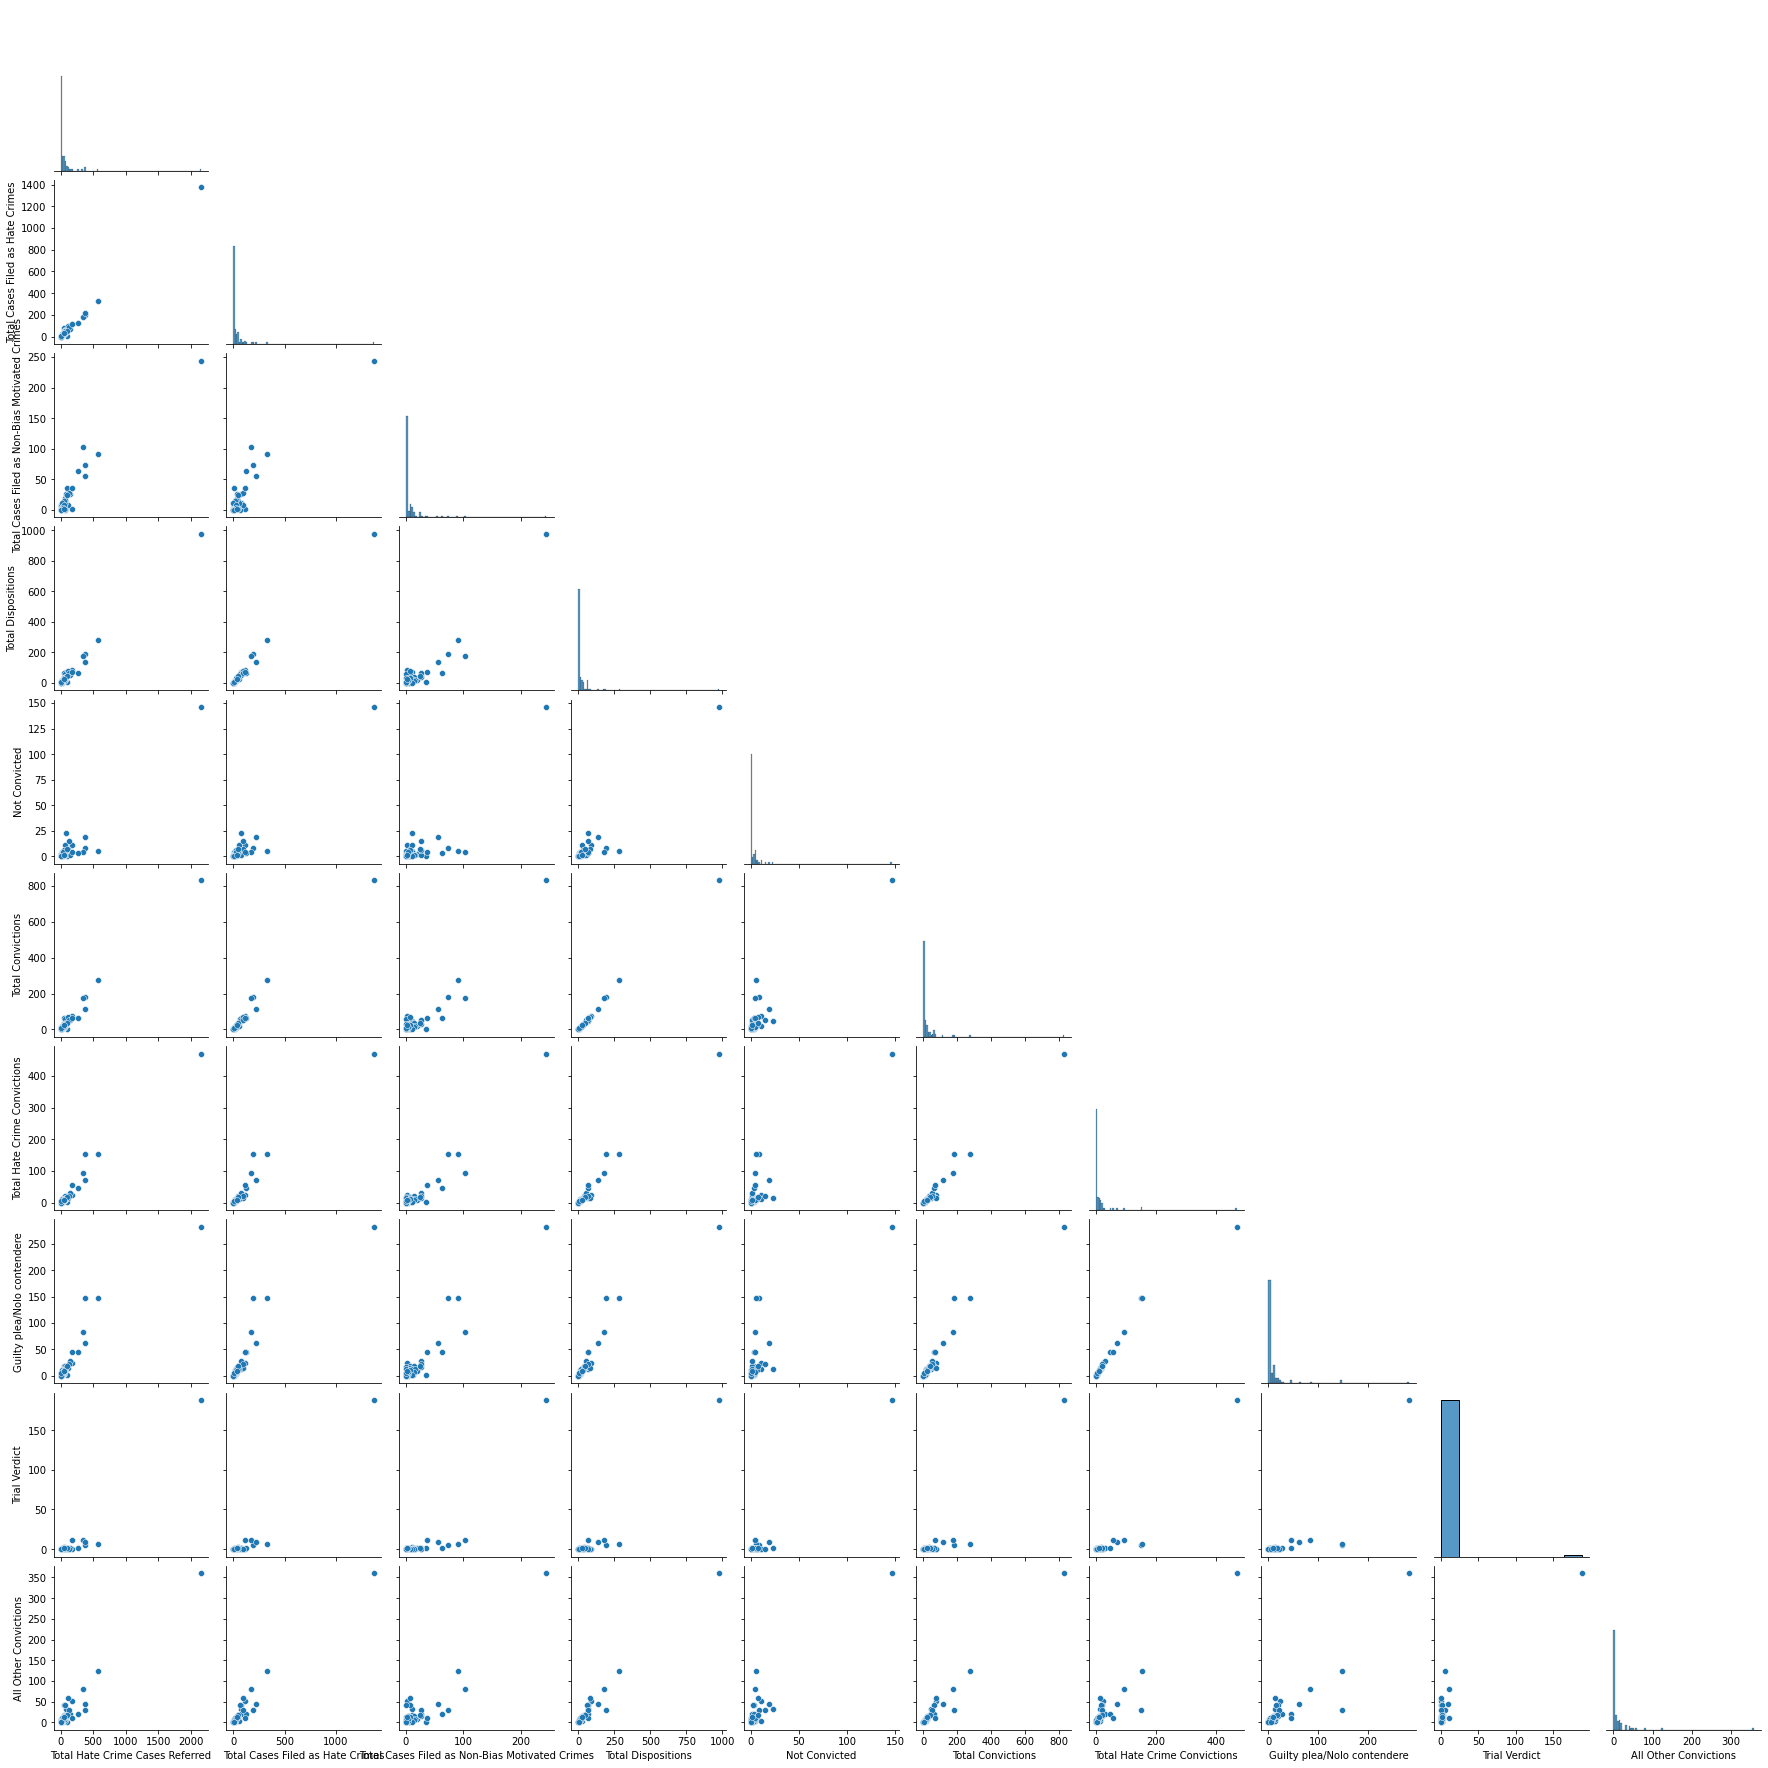

In [27]:
sns.pairplot(prosecution_all_years, corner=True);

In [25]:
prosecution_all_years.to_csv('./California/prosecution_all_years.csv', index=False)

In [5]:
prosecution['Total Hate Crime Convictions'] = prosecution['Total Hate Crime Convictions'].str.replace('-', '0')
prosecution['Total Cases Filed as Hate Crimes'] = prosecution['Total Cases Filed as Hate Crimes'].str.replace('-', '0')
prosecution['Total Hate Crime Convictions'].fillna(0, inplace=True)
prosecution['Total Cases Filed as Hate Crimes'].fillna(0, inplace=True)

In [51]:
prosecution['conviction-rate'] = prosecution['Total Hate Crime Convictions'].astype(int) / prosecution['Total Cases Filed as Hate Crimes'].astype(int)

In [52]:
prosecution['conviction-rate'].value_counts()

0.000000    209
1.000000     74
0.500000     57
0.333333     37
0.250000     18
           ... 
1.166667      1
0.470588      1
0.298507      1
0.909091      1
0.071429      1
Name: conviction-rate, Length: 85, dtype: int64

In [53]:
prosecution.head()

,Year,Agency Type,Agency Name,Total Hate Crime Cases Referred,Total Cases Filed as Hate Crimes,Total Cases Filed as Non-Bias Motivated Crimes,Total Dispositions,Not Convicted,Total Convictions,Total Hate Crime Convictions,Guilty plea/Nolo contendere,Trial Verdict,All Other Convictions,conviction-rate
0,2004,County DA,Alameda,2,2,0,2,1,1,1,1,0,0,0.50
1,2004,County DA,Alpine,0,0,0,0,0,0,0,0,0,0,NaN
2,2004,County DA,Amador,1,1,0,1,0,1,0,0,0,1,0.00
3,2004,County DA,Butte,8,8,2,7,1,6,2,1,1,4,0.25
4,2004,County DA,Calaveras,0,0,0,0,0,0,0,0,0,0,NaN


In [54]:
prosecution['conviction-rate'].fillna(0.0, inplace=True)

In [55]:
prosecution.sort_values(by='conviction-rate', ascending=False)

,Year,Agency Type,Agency Name,Total Hate Crime Cases Referred,Total Cases Filed as Hate Crimes,Total Cases Filed as Non-Bias Motivated Crimes,Total Dispositions,Not Convicted,Total Convictions,Total Hate Crime Convictions,Guilty plea/Nolo contendere,Trial Verdict,All Other Convictions,conviction-rate
204,2007,County DA,Contra Costa,1,0,0,2,0,2,1,1,0,1,inf
773,2015,County DA,Santa Barbara,0,0,0,1,0,1,1,1,0,0,inf
696,2014,County DA,Sacramento,3,0,3,1,0,1,1,0,1,0,inf
876,2017,County DA,Contra Costa,5,0,2,3,0,3,1,1,0,2,inf
752,2015,County DA,Marin,1,0,0,1,0,1,1,0,1,0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,2011,County DA,Madera,0,0,0,0,0,0,0,0,0,0,0.0
482,2011,County DA,Marin,2,0,1,1,0,1,0,0,0,1,0.0
483,2011,County DA,Mariposa,0,0,0,0,0,0,0,0,0,0,0.0
485,2011,County DA,Merced,0,0,0,0,0,0,0,0,0,0,0.0


In [56]:
prosecution[prosecution['conviction-rate'] == np.inf] = 1

In [57]:
prosecution = prosecution[prosecution['Agency Type'] == 'County DA']
prosecution[['Year', 'Agency Name', 'conviction-rate']].to_csv('./California/conviction-rates.csv')

In [58]:
kmeans = KMeans(n_clusters=3)
data = prosecution[['conviction-rate']].astype(float)
kmeans.fit(data)
prosecution['conviction-likely'] = kmeans.labels_

In [59]:
prosecution['conviction-likely'].value_counts()

0    774
1    195
2      9
Name: conviction-likely, dtype: int64

In [60]:
full_data = pd.read_csv('./cleaned_hatecrime.csv', index_col=0)
full_data.columns

Index(['RecordId', 'ClosedYear', 'MonthOccurrence', 'County', 'NCIC',
       'TotalNumberOfVictims', 'TotalNumberOfIndividualVictims',
       'SuspectsRaceAsAGroup', 'TotalNumberOfSuspects', 'MostSeriousUcr',
       'MostSeriousUcrType', 'MostSeriousLocation', 'MostSeriousBias',
       'MostSeriousBiasType', 'MostSeriousVictimType', 'WeaponType',
       'Offensive_Act', 'label'],
      dtype='object')

In [61]:
full_data.head(2)

,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,MostSeriousUcrType,MostSeriousLocation,MostSeriousBias,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act,label
5411,CA00-0000015217,2004,2,Alameda,Alameda Co. Sheriff's Department,2,2,Unknown,0,Intimidation,Violent Crimes,Residence/Home/Driveway,Anti-Black or African American,Race/Ethnicity/Ancestry,Person,None,Daubing of swastika,4.0
5412,CA00-0000015122,2004,3,Alameda,Alameda,1,1,White,1,Destruction/Damage/Vandalism,Property Crimes,Residence/Home/Driveway,Anti-Asian,Race/Ethnicity/Ancestry,Person,None,Threatening letters/flyers/email,4.0


In [62]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19025 entries, 5411 to 24435
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   RecordId                        19025 non-null  object
 1   ClosedYear                      19025 non-null  int64 
 2   MonthOccurrence                 19025 non-null  int64 
 3   County                          19025 non-null  object
 4   NCIC                            19025 non-null  object
 5   TotalNumberOfVictims            19025 non-null  int64 
 6   TotalNumberOfIndividualVictims  19025 non-null  int64 
 7   SuspectsRaceAsAGroup            19025 non-null  object
 8   TotalNumberOfSuspects           19025 non-null  int64 
 9   MostSeriousUcr                  19025 non-null  object
 10  MostSeriousUcrType              19025 non-null  object
 11  MostSeriousLocation             19025 non-null  object
 12  MostSeriousBias                 19025 non-n

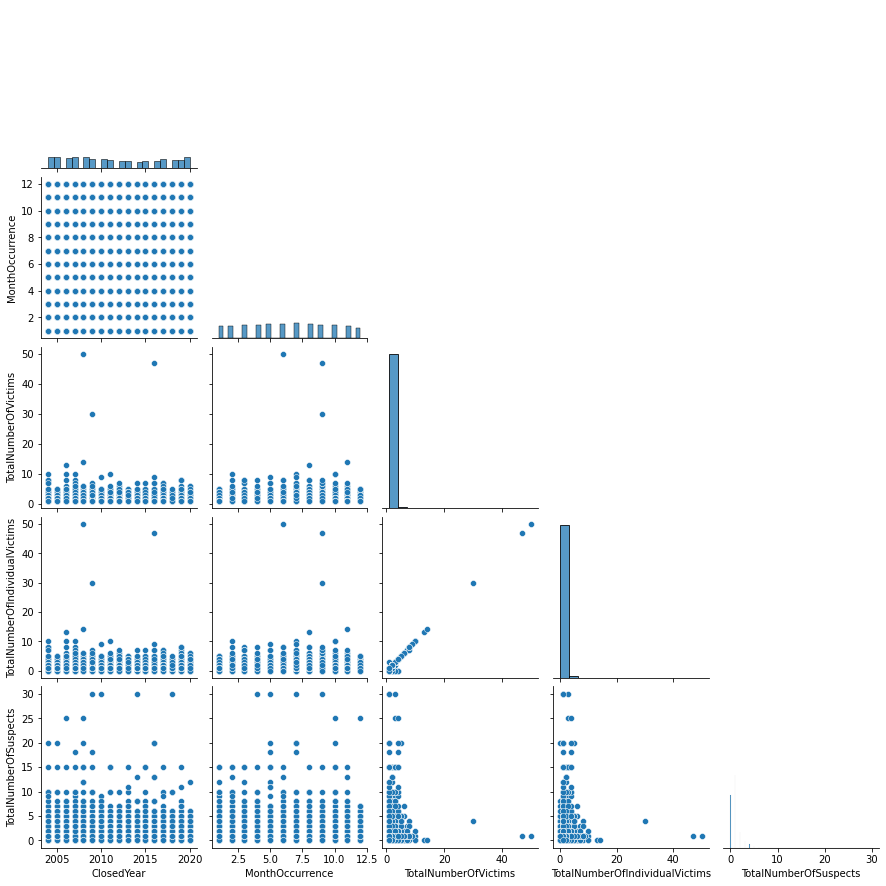

In [63]:
sns.pairplot(full_data, corner=True)
plt.savefig('./plots/numerical_pairplot.png')

In [64]:
full_data.corr()

,ClosedYear,MonthOccurrence,TotalNumberOfVictims,TotalNumberOfIndividualVictims,TotalNumberOfSuspects
ClosedYear,1.000000,0.029676,-0.013856,-0.015197,-0.048419
MonthOccurrence,0.029676,1.000000,0.004410,0.014166,-0.002325
TotalNumberOfVictims,-0.013856,0.004410,1.000000,0.919903,0.121336
TotalNumberOfIndividualVictims,-0.015197,0.014166,0.919903,1.000000,0.199253
TotalNumberOfSuspects,-0.048419,-0.002325,0.121336,0.199253,1.000000


<AxesSubplot:>

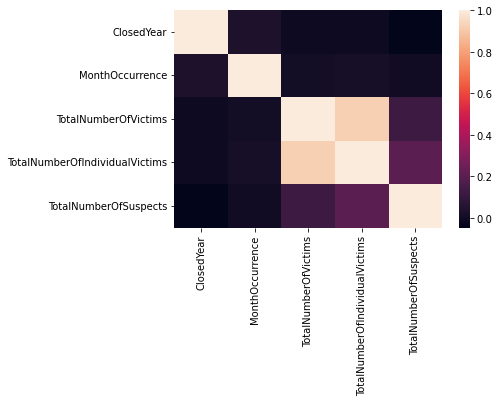

In [65]:
sns.heatmap(full_data.corr())

In [66]:
full_data.columns

Index(['RecordId', 'ClosedYear', 'MonthOccurrence', 'County', 'NCIC',
       'TotalNumberOfVictims', 'TotalNumberOfIndividualVictims',
       'SuspectsRaceAsAGroup', 'TotalNumberOfSuspects', 'MostSeriousUcr',
       'MostSeriousUcrType', 'MostSeriousLocation', 'MostSeriousBias',
       'MostSeriousBiasType', 'MostSeriousVictimType', 'WeaponType',
       'Offensive_Act', 'label'],
      dtype='object')

In [67]:
full_data['SuspectsRaceAsAGroup'].value_counts()

Unknown                                      8008
White                                        5594
Hispanic                                     2213
Black or African American                    2186
Group of Multiple Races                       662
Asian/Pacific Islander                        154
Asian                                          73
East Indian/Asian Indian                       57
American Indian or Alaska Native               53
Native Hawaiian or Other Pacific Islander      25
Name: SuspectsRaceAsAGroup, dtype: int64

In [68]:
full_data['MostSeriousUcr'].value_counts()

Destruction/Damage/Vandalism    6628
Intimidation                    4034
Simple Assault                  3877
Aggravated Assault              3307
Robbery                          638
Burglary                         272
Arson                            128
Larceny-Theft                     90
Rape                              20
Murder                            16
Motor Vehicle Theft               15
Name: MostSeriousUcr, dtype: int64

In [69]:
full_data['MostSeriousLocation'].value_counts()

Highway/Road/Alley/Street              5102
Residence/Home/Driveway                4939
Parking Lot/Garage                     1353
Church/Synagogue/Temple                1100
School/college                          985
School-Elementary/Secondary             559
Restaurant                              497
Commercial/Office Building              474
Other/Unknown                           433
Air/Bus/Train Terminal                  358
School-College/University               332
Field/Woods/Park                        302
Park/Playground                         287
Bar/Night Club                          276
Government/Public Building              256
Jail/Prison                             251
Convenience Store                       204
Grocery/Supermarket                     192
Specialty Store (TV/Fur/etc.)           180
Service/Gas Station                     153
Hotel/Motel/etc.                        134
Department/Discount Store               123
Drug Store/Dr Office/Hospital   

In [70]:
full_data['MostSeriousBias'].value_counts()

Anti-Black or African American                            5967
Anti-Gay (Male)                                           2369
Anti-Jewish                                               2057
Anti-Hispanic or Latino                                   1949
Anti-Lesbian/Gay/Bisexual or Transgender (Mixed Group)    1154
Anti-White                                                 850
Anti-Other Race/Ethnicity/Ancestry                         806
Anti-Asian                                                 666
Anti-Multiple Races (Group)                                557
Anti-Lesbian                                               441
Anti-Other Religion                                        402
Anti-Islamic (Muslim)                                      381
Anti-Transgender                                           343
Anti-Arab                                                  320
Anti-Catholic                                              162
Anti-Multiple Religions (Group)                        

In [71]:
full_data['label'].value_counts()

4.0     9918
2.0     6434
0.0     1822
None     728
1.0       99
3.0       24
Name: label, dtype: int64

In [72]:
X = full_data.drop(columns=['RecordId', 'label'])

In [73]:
ct = make_column_transformer(
    (OneHotEncoder(sparse=False, handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [74]:
X_encoded = ct.fit_transform(X)
X_encoded

array([[1., 0., 0., ..., 2., 2., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [75]:
ct.get_feature_names_out()

array(['County_Alameda', 'County_Alpine', 'County_Amador', 'County_Butte',
       'County_Calaveras', 'County_Colusa', 'County_Contra Costa',
       'County_Del Norte', 'County_El Dorado', 'County_Fresno',
       'County_Glenn', 'County_Humboldt', 'County_Imperial',
       'County_Inyo', 'County_Kern', 'County_Kings', 'County_Lake',
       'County_Lassen', 'County_Los Angeles', 'County_Madera',
       'County_Marin', 'County_Mariposa', 'County_Mendocino',
       'County_Merced', 'County_Mono', 'County_Monterey', 'County_Napa',
       'County_Nevada', 'County_Orange', 'County_Placer', 'County_Plumas',
       'County_Riverside', 'County_Sacramento', 'County_San Benito',
       'County_San Bernardino', 'County_San Diego',
       'County_San Francisco', 'County_San Joaquin',
       'County_San Luis Obispo', 'County_San Mateo',
       'County_Santa Barbara', 'County_Santa Clara', 'County_Santa Cruz',
       'County_Shasta', 'County_Siskiyou', 'County_Solano',
       'County_Sonoma', 'County

In [76]:
X_encoded = pd.DataFrame(X_encoded, columns=ct.get_feature_names_out())

In [77]:
# plt.figure(figsize=(20, 20))
# sns.heatmap(X_encoded.corr())
# plt.savefig('./plots/heatmap.png')

In [78]:
#df by objects/strings
full_data[full_data['label'] == 'None'] = '10.0'
df_cat = full_data.iloc[:,np.array(full_data.dtypes == 'O')].copy()

#calculate the anova score for each categorical feature
cat_anova = []
for x in df_cat.columns:
    gby = df_cat.groupby(x)['label'].apply(list)
    
    anova_res = stats.f_oneway(*gby)
    cat_anova.append((x,anova_res[1]))
    #print(f"Anova result for {x}: {anova_res[1]}")
    
cat_anova.sort(key=lambda x: x[1])
cat_anova_df = pd.DataFrame(cat_anova)

/Users/andresperez/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [79]:
cat_anova_df

,0,1
0,RecordId,0.0
1,ClosedYear,0.0
2,MonthOccurrence,0.0
3,County,0.0
4,NCIC,0.0
5,TotalNumberOfVictims,0.0
6,TotalNumberOfIndividualVictims,0.0
7,SuspectsRaceAsAGroup,0.0
8,TotalNumberOfSuspects,0.0
9,MostSeriousUcr,0.0


In [80]:
df_cat['label'].unique()

array(['4.0', '2.0', '0.0', '1.0', '3.0', '10.0'], dtype=object)

In [82]:
#df by objects/strings
df_cat = full_data.iloc[:,np.array(full_data.dtypes == 'O')].copy()

chi2 = []
for col in df_cat.columns:
    crosstab_res = pd.crosstab(index=df_cat[col], columns=df_cat['label'])
    chi_res = chi2_contingency(crosstab_res)
    chi2.append([col, chi_res[1]])
pd.DataFrame(chi2).sort_values(by=1)

,0,1
8,TotalNumberOfSuspects,0.000000e+00
15,WeaponType,0.000000e+00
14,MostSeriousVictimType,0.000000e+00
13,MostSeriousBiasType,0.000000e+00
12,MostSeriousBias,0.000000e+00
11,MostSeriousLocation,0.000000e+00
10,MostSeriousUcrType,0.000000e+00
9,MostSeriousUcr,0.000000e+00
17,label,0.000000e+00
7,SuspectsRaceAsAGroup,0.000000e+00
